In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
trans_df = pd.read_excel("/Users/nikhil/Downloads/QVI_transaction.xlsx")
cust_df = pd.read_csv("/Users/nikhil/Downloads/QVI_purchase_behaviour.csv")

In [3]:
df = pd.merge(trans_df, cust_df, how="outer", on="LYLTY_CARD_NBR")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


#### Date is not in date format. First convert it into Date format.

In [4]:
origin = pd.Timestamp("30/12/1899")
df["DATE"] = df["DATE"].apply(lambda x: origin + pd.Timedelta(days=x))
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [5]:
df.shape

(264836, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [7]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### This clears out that our data has no missing values.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


In [9]:
df.describe(exclude="number").T

,count,unique,top,freq,first,last
DATE,264836,364,2018-12-24 00:00:00,939,2018-07-01,2019-06-30
PROD_NAME,264836,114,Kettle Mozzarella Basil & Pesto 175g,3304,NaT,NaT
LIFESTAGE,264836,7,OLDER SINGLES/COUPLES,54479,NaT,NaT
PREMIUM_CUSTOMER,264836,3,Mainstream,101988,NaT,NaT


Here we can see the 75% of PROD_QTY is 2 and 100% of PROD_QTY is 200 which shows that our data have some outliers.

### Handling Outliers

In [10]:
df[df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


There are only two rows of outliers. Let's remove it first then move further.

In [11]:
out_ind = df[df['PROD_QTY'] == 200].index
df.drop(out_ind, axis=0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   LIFESTAGE         264834 non-null  object        
 9   PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


### Now let's get some new columns.

In [13]:
df['PROD_WT'] = df['PROD_NAME'].str[-4:].str[:3]
df['BRAND'] = df['PROD_NAME'].str.split(" ", n=1, expand=True)[0]
df['PROD_NAME'] = df['PROD_NAME'].str.strip().str[:-4]

In [14]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_WT,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


In [15]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
DATE,264834,364,2018-12-24 00:00:00,939,2018-07-01,2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STORE_NBR,264834.0,NaN,NaN,NaN,NaT,NaT,135.079423,76.784063,1.0,70.0,130.0,203.0,272.0
LYLTY_CARD_NBR,264834.0,NaN,NaN,NaN,NaT,NaT,135548.793331,80579.898912,1000.0,70021.0,130357.0,203094.0,2373711.0
TXN_ID,264834.0,NaN,NaN,NaN,NaT,NaT,135157.623236,78132.920436,1.0,67600.5,135136.5,202699.75,2415841.0
PROD_NBR,264834.0,NaN,NaN,NaN,NaT,NaT,56.583554,32.826444,1.0,28.0,56.0,85.0,114.0
PROD_NAME,264834,114,Kettle Mozzarella Basil & Pesto,3304,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROD_QTY,264834.0,NaN,NaN,NaN,NaT,NaT,1.905813,0.343436,1.0,2.0,2.0,2.0,5.0
TOT_SALES,264834.0,NaN,NaN,NaN,NaT,NaT,7.299346,2.527241,1.5,5.4,7.4,9.2,29.5
LIFESTAGE,264834,7,OLDER SINGLES/COUPLES,54479,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PREMIUM_CUSTOMER,264834,3,Mainstream,101988,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['BRAND'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Old', 'Tyrrells',
       'Dorito', 'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red',
       'GrnWves', 'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD',
       'Infzns', 'Burger', 'NCC', 'Cheezels', 'Smith', 'Woolworths',
       'French', 'Sunbites', 'Cheetos', 'Snbts'], dtype=object)

In [17]:
df.replace("Red" , "RRD", inplace=True)
df.replace("Snbts" , "Sunbites", inplace=True)
df.replace("Infzns" , "Infuzions", inplace=True)
df.replace("WW" , "Woolworths", inplace=True)
df.replace("Smith" , "Smiths", inplace=True)
df.replace("NCC" , "Natural", inplace=True)
df.replace("Dorito" , "Doritos", inplace=True)
df.replace("Grain" , "GrnWves", inplace=True)

<AxesSubplot: xlabel='PREMIUM_CUSTOMER', ylabel='count'>

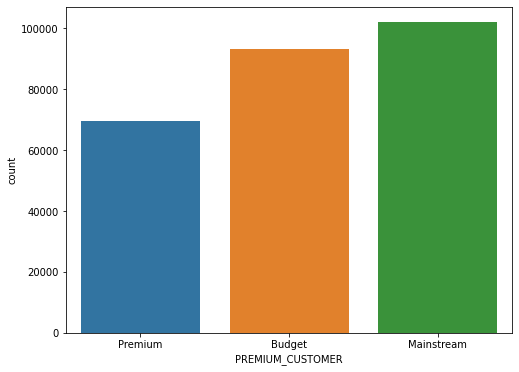

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x= df['PREMIUM_CUSTOMER'])

Text(0.5, 1.0, 'Lifestage of Customers')

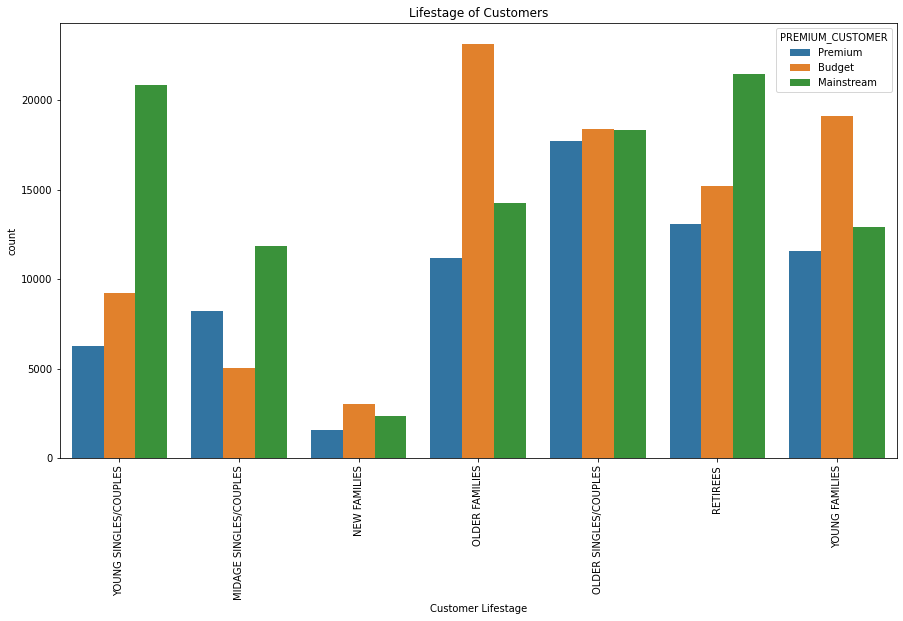

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x = df['LIFESTAGE'], hue=df['PREMIUM_CUSTOMER'])
plt.xlabel('Customer Lifestage')
plt.xticks(rotation=90)
plt.title('Lifestage of Customers')

Text(0.5, 1.0, 'Count of Product Bought by Weight')

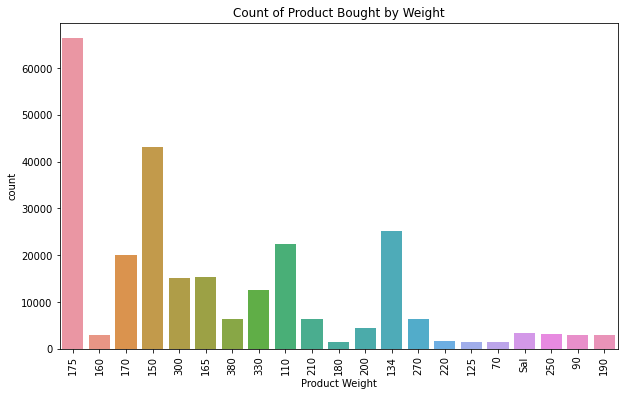

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['PROD_WT'])
plt.xlabel('Product Weight')
plt.xticks(rotation=90)
plt.title('Count of Product Bought by Weight')

<AxesSubplot: xlabel='PROD_QTY', ylabel='count'>

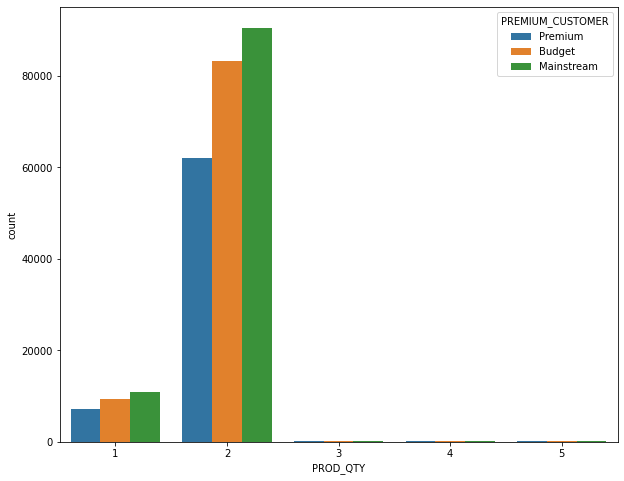

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x = df['PROD_QTY'], hue=df['PREMIUM_CUSTOMER'])

<AxesSubplot: xlabel='DATE', ylabel='DATE'>

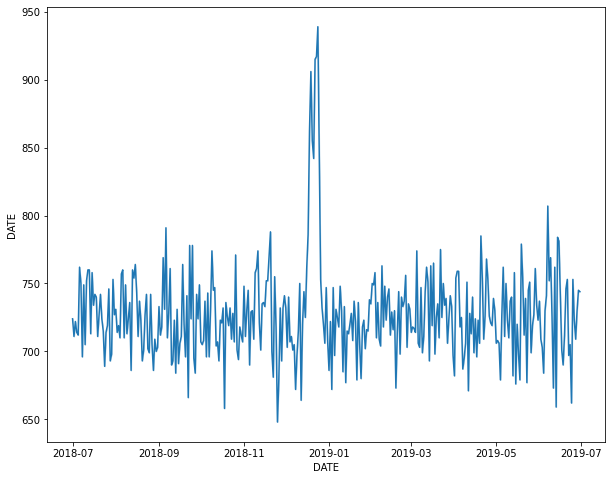

In [22]:
date_count = pd.Series(df.DATE.map(df.groupby('DATE').size()))
plt.figure(figsize=(10,8))
sns.lineplot(x = df['DATE'], y=date_count)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Natural'),
  Text(1, 0, 'CCs'),
  Text(2, 0, 'Woolworths'),
  Text(3, 0, 'Smiths'),
  Text(4, 0, 'Kettle'),
  Text(5, 0, 'Old'),
  Text(6, 0, 'Tyrrells'),
  Text(7, 0, 'Doritos'),
  Text(8, 0, 'Infuzions'),
  Text(9, 0, 'GrnWves'),
  Text(10, 0, 'Thins'),
  Text(11, 0, 'RRD'),
  Text(12, 0, 'Tostitos'),
  Text(13, 0, 'Pringles'),
  Text(14, 0, 'Cobs'),
  Text(15, 0, 'Twisties'),
  Text(16, 0, 'Burger'),
  Text(17, 0, 'Cheezels'),
  Text(18, 0, 'French'),
  Text(19, 0, 'Sunbites'),
  Text(20, 0, 'Cheetos')])

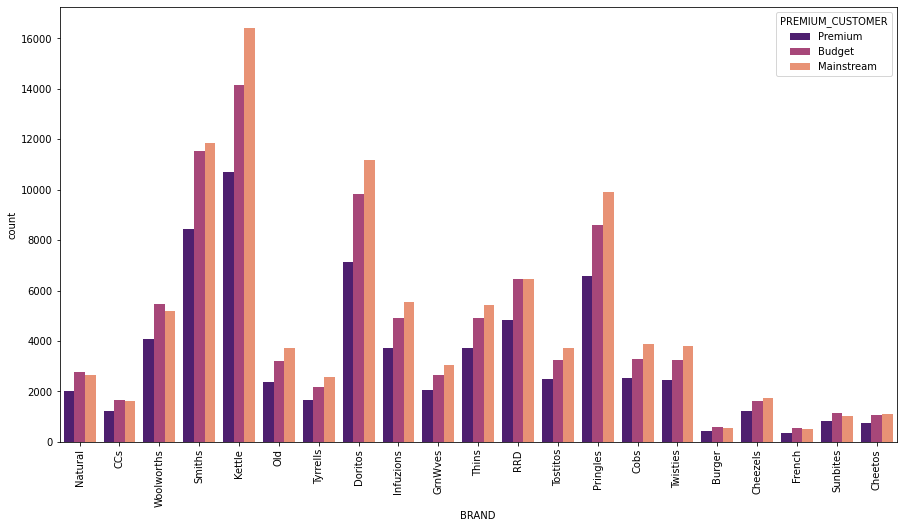

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x = df['BRAND'], hue=df['PREMIUM_CUSTOMER'], palette='magma')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Natural'),
  Text(1, 0, 'CCs'),
  Text(2, 0, 'Woolworths'),
  Text(3, 0, 'Smiths'),
  Text(4, 0, 'Kettle'),
  Text(5, 0, 'Old'),
  Text(6, 0, 'Tyrrells'),
  Text(7, 0, 'Doritos'),
  Text(8, 0, 'Infuzions'),
  Text(9, 0, 'GrnWves'),
  Text(10, 0, 'Thins'),
  Text(11, 0, 'RRD'),
  Text(12, 0, 'Tostitos'),
  Text(13, 0, 'Pringles'),
  Text(14, 0, 'Cobs'),
  Text(15, 0, 'Twisties'),
  Text(16, 0, 'Burger'),
  Text(17, 0, 'Cheezels'),
  Text(18, 0, 'French'),
  Text(19, 0, 'Sunbites'),
  Text(20, 0, 'Cheetos')])

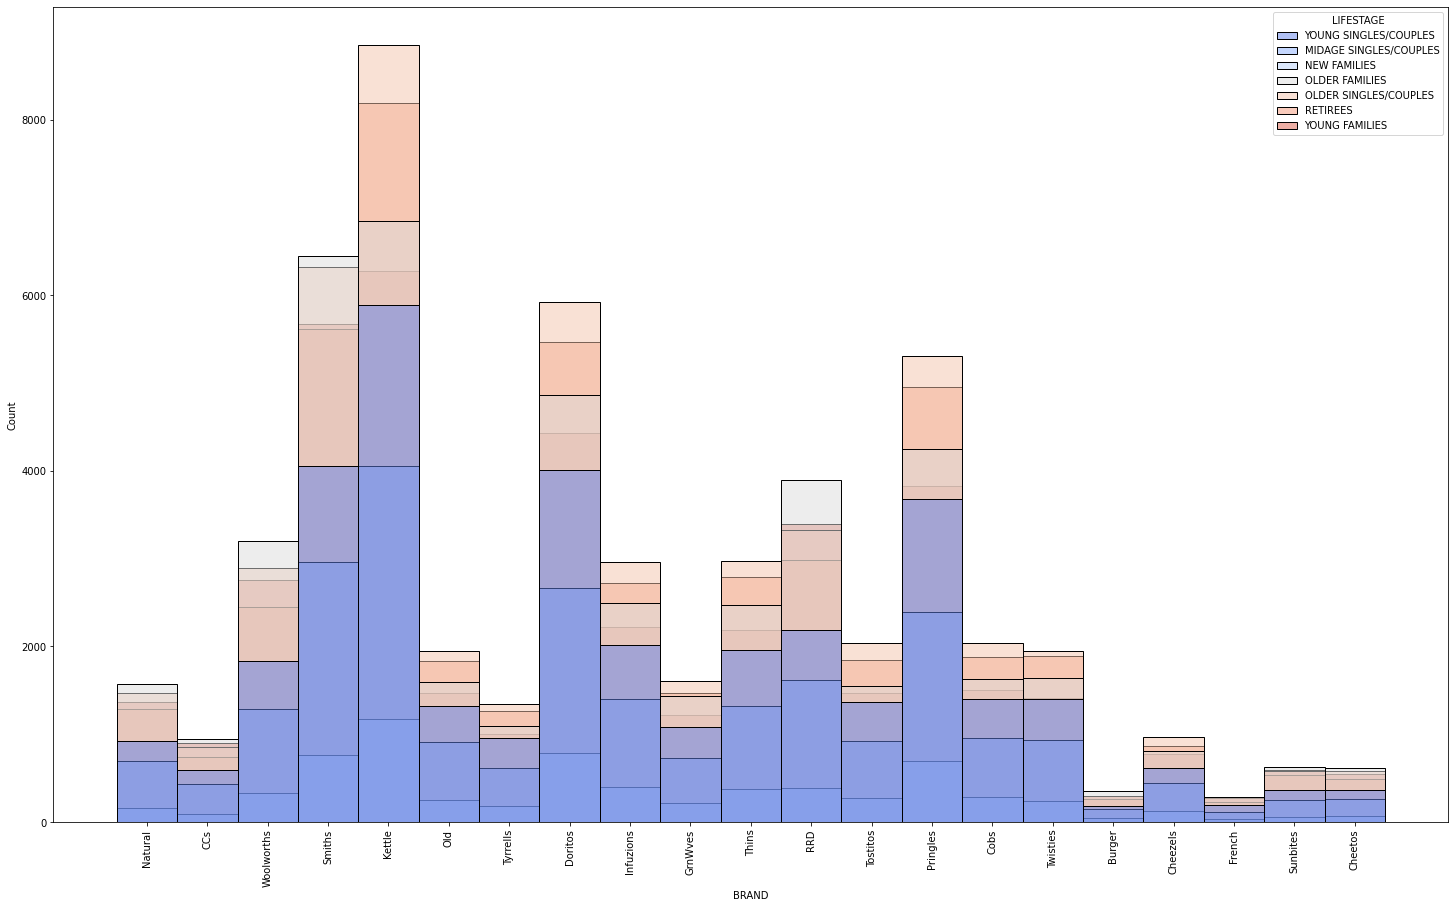

In [24]:
plt.figure(figsize=(25,15))
sns.histplot(x = df['BRAND'],hue=df['LIFESTAGE'], palette='coolwarm')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Natural'),
  Text(1, 0, 'CCs'),
  Text(2, 0, 'Woolworths'),
  Text(3, 0, 'Smiths'),
  Text(4, 0, 'Kettle'),
  Text(5, 0, 'Old'),
  Text(6, 0, 'Tyrrells'),
  Text(7, 0, 'Doritos'),
  Text(8, 0, 'Infuzions'),
  Text(9, 0, 'GrnWves'),
  Text(10, 0, 'Thins'),
  Text(11, 0, 'RRD'),
  Text(12, 0, 'Tostitos'),
  Text(13, 0, 'Pringles'),
  Text(14, 0, 'Cobs'),
  Text(15, 0, 'Twisties'),
  Text(16, 0, 'Burger'),
  Text(17, 0, 'Cheezels'),
  Text(18, 0, 'French'),
  Text(19, 0, 'Sunbites'),
  Text(20, 0, 'Cheetos')])

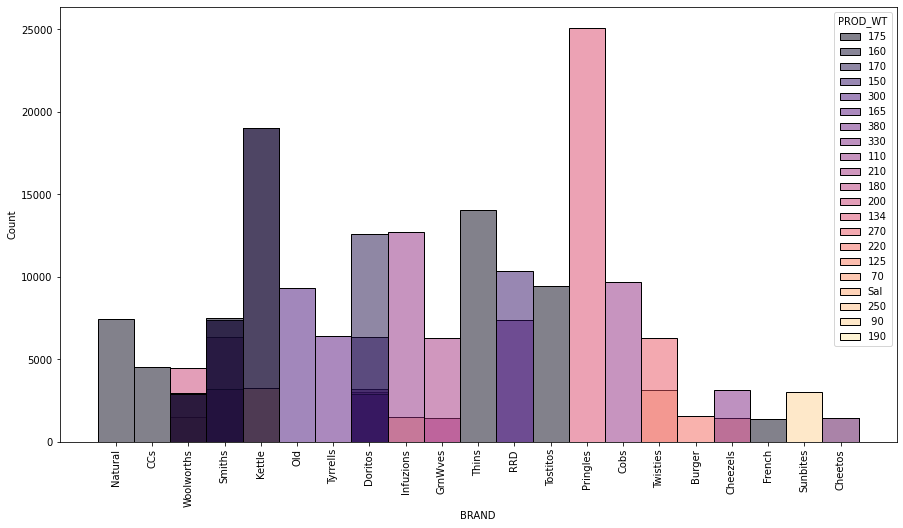

In [29]:
plt.figure(figsize=(15,8))
sns.histplot(x = df['BRAND'],hue=df['PROD_WT'], palette='magma')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'YOUNG SINGLES/COUPLES'),
  Text(1, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(2, 0, 'NEW FAMILIES'),
  Text(3, 0, 'OLDER FAMILIES'),
  Text(4, 0, 'OLDER SINGLES/COUPLES'),
  Text(5, 0, 'RETIREES'),
  Text(6, 0, 'YOUNG FAMILIES')])

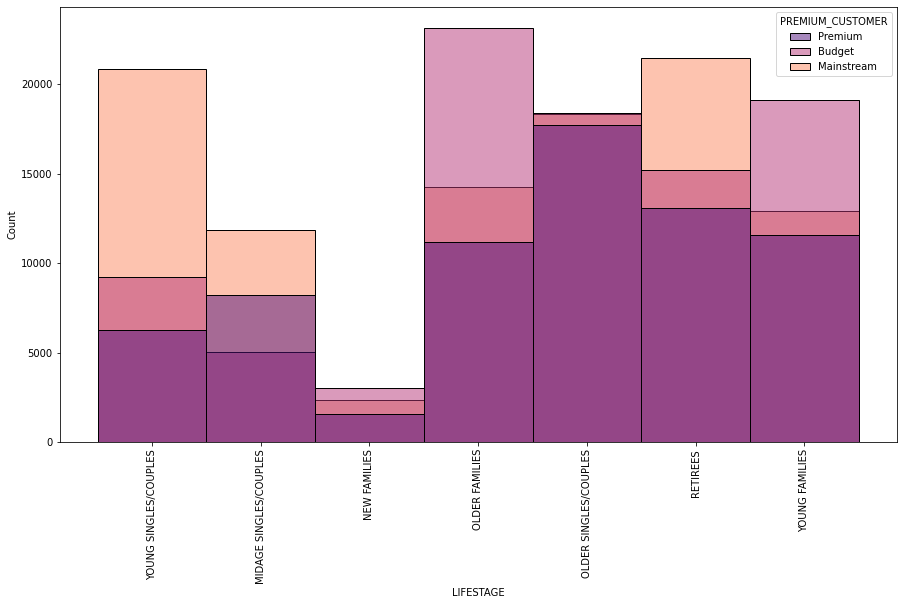

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(x = df['LIFESTAGE'], hue = df['PREMIUM_CUSTOMER'], palette='magma')
plt.xticks(rotation=90)

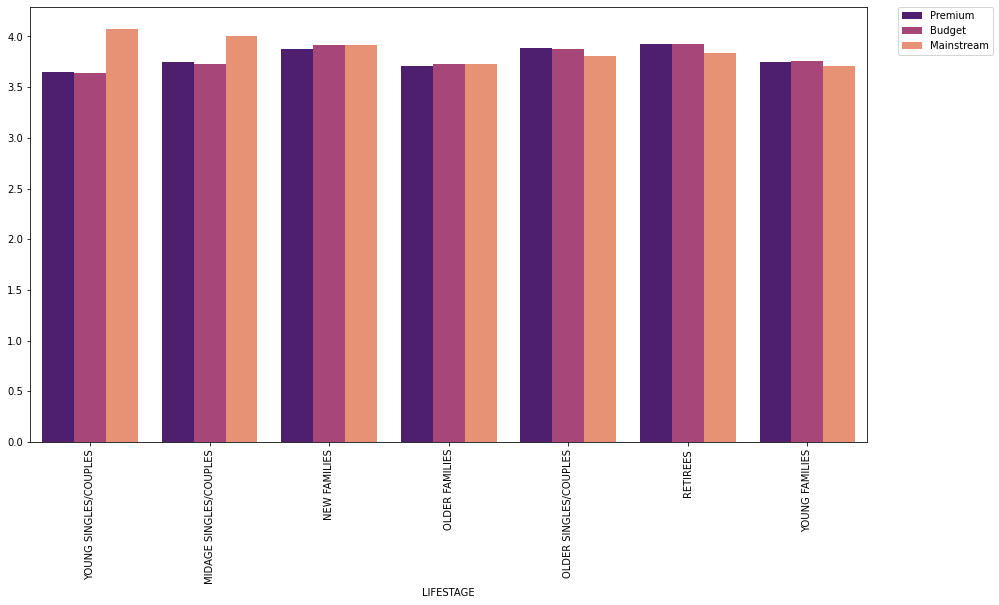

In [27]:
avg_price = (df['TOT_SALES'])/(df['PROD_QTY'])
plt.figure(figsize=(15,8))
sns.barplot(x = df['LIFESTAGE'],y=avg_price, hue=df['PREMIUM_CUSTOMER'], palette='magma', errwidth=0)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', borderaxespad=0)

## Conclusion

1. We can see Mainstream customers are high in numbers after them comes Budget and lastly Premium customers.
2. Most part of mainstream cusomers are from Young Singles/Couples and Retirees. Budget and Premium customers are mostly from all life stage.
3. Chips are coming from 70 to 380 gm packets.
4. 175gm chips packet is highest selling and 70 gm chips packet is lowest selling.
5. All customers are purchasing 2 packets regularly.
6. Smiths, Kettle, Dorritos and Pringles are the only brands selling more than 2000 times. Kettle being the highest selling brand.
7. Pringles only sell 134gm packet.